In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [52]:
df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [53]:
df.shape

(381, 13)

In [54]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [56]:
le = LabelEncoder()
for column in df.columns:
    if column == 'Loan_Status':
        pass
    elif df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [57]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
1,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
2,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
3,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
4,4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,Y


In [58]:
from sklearn.impute import SimpleImputer

columns_with_missing = df.columns[df.isnull().any()]
imputer = SimpleImputer(strategy='mean')
df[columns_with_missing] = imputer.fit_transform(df[columns_with_missing])
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
1,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
2,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
3,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
4,4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,Y


In [59]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [60]:
X = df.drop(columns=['Loan_Status']) 
y = df['Loan_Status'] 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

In [61]:
k_values = [3, 5, 7]
similarity_measures = ['euclidean', 'manhattan']
results = {}

for k in k_values:
    for sim_measure in similarity_measures:
        
        knn = KNeighborsClassifier(n_neighbors=k, metric=sim_measure)
        knn.fit(x_train, y_train)
        
        y_pred = knn.predict(x_test)
       
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        results[(k, sim_measure)] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'confusion_matrix': conf_matrix
        }


In [62]:
for key, value in results.items():
    print(f"k={key[0]}, Similarity Measure={key[1]}:")
    print("Accuracy:", value['accuracy'])
    print("Precision:", value['precision'])
    print("Recall:", value['recall'])
    print("F1-score:", value['f1'])
    print("Confusion Matrix:")
    print(value['confusion_matrix'])
    print()

k=3, Similarity Measure=euclidean:
Accuracy: 0.6196721311475409
Precision: 0.4619825169058222
Recall: 0.47632741090685016
F1-score: 0.45682878899533275
Confusion Matrix:
[[ 11  80]
 [ 36 178]]

k=3, Similarity Measure=manhattan:
Accuracy: 0.6196721311475409
Precision: 0.4481626131723771
Recall: 0.47001129711410083
F1-score: 0.44531543960867936
Confusion Matrix:
[[  9  82]
 [ 34 180]]

k=5, Similarity Measure=euclidean:
Accuracy: 0.6360655737704918
Precision: 0.42696969696969694
Recall: 0.4690613125192565
F1-score: 0.42782538153424937
Confusion Matrix:
[[  5  86]
 [ 25 189]]

k=5, Similarity Measure=manhattan:
Accuracy: 0.6524590163934426
Precision: 0.4775724040499176
Recall: 0.49021772619903464
F1-score: 0.4569672131147541
Confusion Matrix:
[[  8  83]
 [ 23 191]]

k=7, Similarity Measure=euclidean:
Accuracy: 0.6491803278688525
Precision: 0.42852906287069986
Recall: 0.47524905001540513
F1-score: 0.4267018006148441
Confusion Matrix:
[[  4  87]
 [ 20 194]]

k=7, Similarity Measure=manhatt

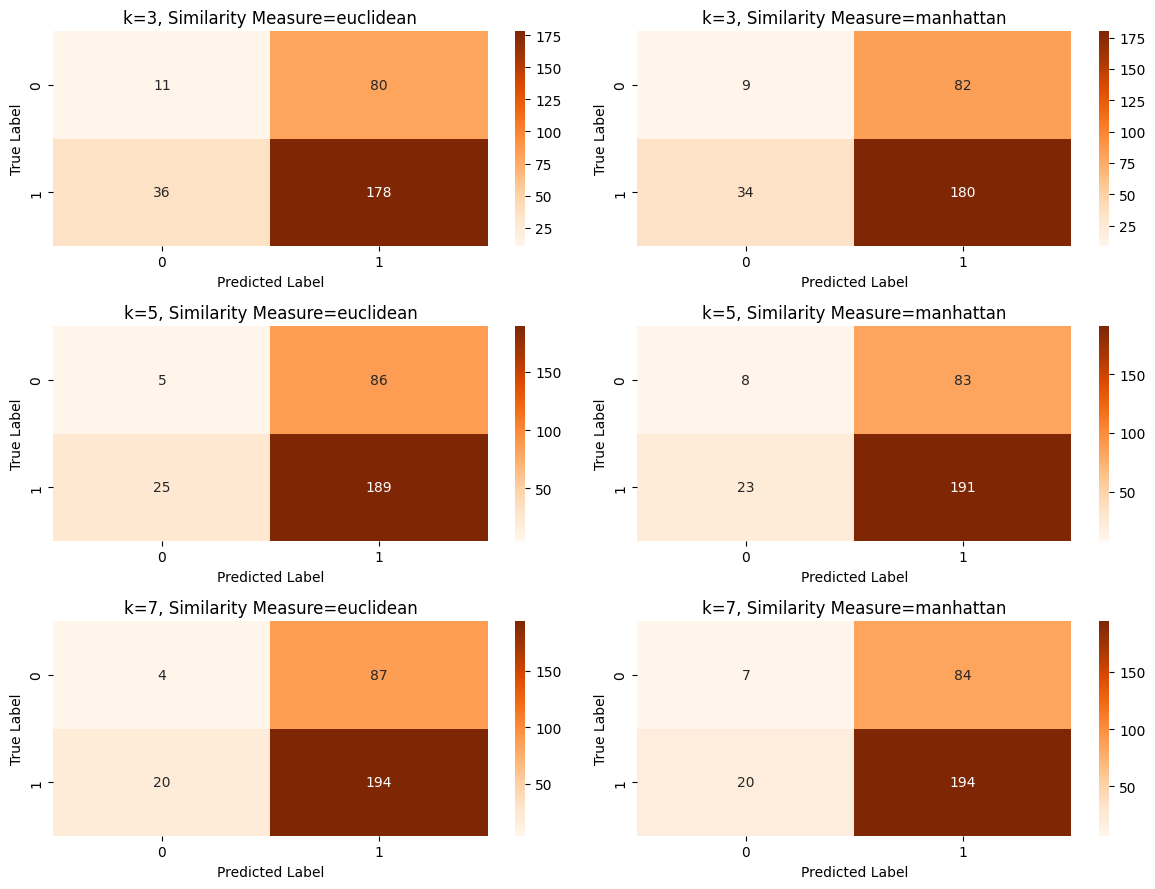

In [67]:
fig, axes = plt.subplots(len(k_values), len(similarity_measures), figsize=(12, 9))

for i, k in enumerate(k_values):
    for j, sim_measure in enumerate(similarity_measures):
        key = (k, sim_measure)
        matrix = results[key]['confusion_matrix']
        ax = axes[i, j]
        sns.heatmap(matrix, annot=True, fmt='d', cmap='Oranges', ax=ax)
        ax.set_title(f'k={k}, Similarity Measure={sim_measure}')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()
